In [31]:
import pandas as pd
import numpy as np
import datetime as dt
import investpy
import cufflinks as cf
import plotly.io as pio
import os
import matplotlib.pyplot as plt

<h3>Crawl các mã cổ phiếu

In [32]:
def find_nasdaq_indices():
    # Lấy danh sách chỉ số của Hoa Kỳ
    indices = investpy.indices.get_indices(country='united states')
    # Lọc và in ra các chỉ số có từ "Nasdaq" trong tên
    nasdaq_indices = indices[indices['name'].str.contains("Nasdaq", case=False)]
    print(nasdaq_indices[['name', 'symbol']])

find_nasdaq_indices()

                                                   name       symbol
381                                  NASDAQ Health Care          IXC
394                                          Nasdaq 100          NDX
395                                              Nasdaq         IXIC
649                              CBOE NASDAQ 100 Settle          NDS
797                                   Nasdaq Factor Dog        NQDOG
798                      Nasdaq Emerging Select Leaders       NQEMSL
799              Nasdaq Dorsey Wright Peoples Portfolio      NQDWAPP
800                     Nasdaq Developed Select Leaders       NQDMSL
803   Nasdaq BulletShares Investment Grade 7 Year La...      NQBIG7T
804   Nasdaq BulletShares Investment Grade 7 Year La...       NQBIG7
806   Nasdaq BulletShares Investment Grade 5 Year La...      NQBIG5T
807   Nasdaq BulletShares Investment Grade 3 Year La...      NQBIG3T
808   Nasdaq BulletShares Investment Grade 3 Year La...       NQBIG3
809     Nasdaq BulletShares High Y

In [33]:
start = "01/01/2015"
end = dt.datetime.now().strftime("%d/%m/%Y")
data_folder = "D:\\Github Mikezxc\\naduy-stock\\Data_stock"  # Đường dẫn thư mục lưu trữ

# Tạo thư mục nếu nó không tồn tại
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

def check_and_save_index(index, country, file_name):
    full_path = os.path.join(data_folder, file_name)  # Tạo đường dẫn file hoàn chỉnh
    if not os.path.exists(full_path):  # Kiểm tra xem file đã tồn tại chưa
        try:
            data = investpy.get_index_historical_data(index=index, country=country, from_date=start, to_date=end)
            data.drop("Currency", axis=1, inplace=True)
            data.to_csv(full_path)
            print(f"Dữ liệu chỉ số {index} đã được lưu thành công vào '{full_path}'")
        except Exception as e:
            print(f"Đã xảy ra lỗi khi lấy dữ liệu cho chỉ số {index}: {e}")
    else:
        print(f"File '{full_path}' đã tồn tại. Không cần crawl lại dữ liệu.")

def check_and_save_stock(stock, country, file_name):
    full_path = os.path.join(data_folder, file_name)  # Tạo đường dẫn file hoàn chỉnh
    if not os.path.exists(full_path):
        try:
            data = investpy.get_stock_historical_data(stock=stock, country=country, from_date=start, to_date=end)
            data.drop("Currency", axis=1, inplace=True)
            data.to_csv(full_path)
            print(f"Dữ liệu cổ phiếu {stock} đã được lưu thành công vào '{full_path}'")
        except Exception as e:
            print(f"Đã xảy ra lỗi khi lấy dữ liệu cho cổ phiếu {stock}: {e}")
    else:
        print(f"File '{full_path}' đã tồn tại. Không cần crawl lại dữ liệu.")

# Cập nhật mã cho chỉ số phù hợp
check_and_save_index("S&P 500", "united states", "SP500_stock_data.csv")
check_and_save_index("Nasdaq", "united states", "NASDAQ_stock_data.csv")

# Các mã cổ phiếu
check_and_save_stock("AAPL", "united states", "AAPL_stock_data.csv")
check_and_save_stock("VNM", "vietnam", "VNM_stock_data.csv")
check_and_save_stock("FPT", "vietnam", "FPT_stock_data.csv")
check_and_save_stock("GAS", "vietnam", "GAS_stock_data.csv")
check_and_save_stock("BID", "vietnam", "BID_stock_data.csv")
check_and_save_stock("VCB", "vietnam", "VCB_stock_data.csv")
check_and_save_stock("CTG", "vietnam", "CTG_stock_data.csv")
check_and_save_stock("ACB", "vietnam", "ACB_stock_data.csv")


File 'D:\Github Mikezxc\naduy-stock\Data_stock\SP500_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\NASDAQ_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\AAPL_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\VNM_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\FPT_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\GAS_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\BID_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\VCB_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezxc\naduy-stock\Data_stock\CTG_stock_data.csv' đã tồn tại. Không cần crawl lại dữ liệu.
File 'D:\Github Mikezx

In [34]:
# Hàm để đọc dữ liệu từ file CSV vào DataFrame
def load_data(file_name):
    full_path = os.path.join(data_folder, file_name)
    if os.path.exists(full_path):
        return pd.read_csv(full_path)
    else:
        print(f"File '{full_path}' không tồn tại.")
        return None

# Đọc dữ liệu các chỉ số và cổ phiếu vào biến tương ứng
SP500 = load_data("SP500_stock_data.csv")
NASDAQ = load_data("NASDAQ_stock_data.csv")
AAPL = load_data("AAPL_stock_data.csv")
VNM = load_data("VNM_stock_data.csv")
FPT = load_data("FPT_stock_data.csv")
GAS = load_data("GAS_stock_data.csv")
BID = load_data("BID_stock_data.csv")
VCB = load_data("VCB_stock_data.csv")
CTG = load_data("CTG_stock_data.csv")
ACB = load_data("ACB_stock_data.csv")

# Kiểm tra nội dung của một trong những DataFrame, ví dụ NASDAQ
if NASDAQ is not None:
    print(NASDAQ.head())  # In ra 5 dòng đầu của dữ liệu NASDAQ


         Date     Open     High      Low    Close     Volume
0  2015-01-02  4760.24  4777.01  4698.11  4726.81  367738144
1  2015-01-05  4700.34  4702.77  4641.46  4652.57  476454400
2  2015-01-06  4666.85  4667.33  4567.60  4592.74  553615808
3  2015-01-07  4626.84  4652.72  4613.90  4650.47  482505472
4  2015-01-08  4689.54  4741.38  4688.02  4736.19  548099008


In [35]:
ACB.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-05,4015.5,4015.5,3963.3,3989.4,205356
1,2015-01-06,3963.3,4041.5,3937.2,4041.5,329971
2,2015-01-07,4041.5,4171.9,4041.5,4093.7,855631
3,2015-01-08,4093.7,4119.8,4067.6,4119.8,54675
4,2015-01-09,4119.8,4250.1,4067.6,4145.8,2548668


In [36]:
VCB.tail()

,Date,Open,High,Low,Close,Volume
2322,2024-04-24,90100.0,94800.0,90000.0,90000.0,1925200
2323,2024-04-25,90700.0,92900.0,89700.0,91000.0,1235700
2324,2024-04-26,92000.0,93300.0,91000.0,91200.0,1698300
2325,2024-05-02,91200.0,93000.0,90360.0,91900.0,932400
2326,2024-05-03,93500.0,93500.0,90800.0,92500.0,1470700


In [37]:
VCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2327 non-null   object 
 1   Open    2327 non-null   float64
 2   High    2327 non-null   float64
 3   Low     2327 non-null   float64
 4   Close   2327 non-null   float64
 5   Volume  2327 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 109.2+ KB


In [38]:
data_folder = "D:\\Github Mikezxc\\naduy-stock\\Data_stock"  # Đường dẫn thư mục lưu trữ
combined_file_path = os.path.join(data_folder, "combined_bank_stocks.csv")  # Đường dẫn file kết hợp

# Danh sách tên các cổ phiếu và tên file CSV tương ứng
list_stocks = ['CTG', 'ACB', 'VCB', 'AAPL', 'SP500', 'NASDAQ', 'VNM', 'FPT', 'GAS', 'BID']
csv_files = [f"{stock}_stock_data.csv" for stock in list_stocks]

# Xóa file kết hợp cũ nếu nó tồn tại
if os.path.exists(combined_file_path):
    os.remove(combined_file_path)
    print(f"File cũ '{combined_file_path}' đã được xóa.")

dataframes = []

# Đọc từng file CSV, tạo DataFrame riêng và thêm vào danh sách dataframes
for file_name, stock in zip(csv_files, list_stocks):
    full_path = os.path.join(data_folder, file_name)
    if os.path.exists(full_path):
        df = pd.read_csv(full_path)
        # Gán MultiIndex cho mỗi DataFrame
        df.columns = pd.MultiIndex.from_product([[stock], df.columns])
        dataframes.append(df)
    else:
        print(f"File '{full_path}' không tồn tại.")

if dataframes:
    # Nối các DataFrame theo cột
    combined_stocks = pd.concat(dataframes, axis=1)
    combined_stocks.columns.names = ['Stock Name', 'Stock Info']

    # Lưu kết quả vào một file CSV mới
    combined_stocks.to_csv(combined_file_path)
    print("Dữ liệu đã được lưu thành công vào 'combined_bank_stocks.csv'")
else:
    print("Không có dữ liệu để ghép nối và lưu.")


File cũ 'D:\Github Mikezxc\naduy-stock\Data_stock\combined_bank_stocks.csv' đã được xóa.
Dữ liệu đã được lưu thành công vào 'combined_bank_stocks.csv'


In [39]:
# Đọc lại file nếu cần và sử dụng dữ liệu
if os.path.exists(combined_file_path):
    combined_stocks = pd.read_csv(combined_file_path, header=[0, 1], index_col=0)
    print(combined_stocks.head())  # Hiển thị nội dung của file để kiểm tra

Stock Name         CTG                                                    ACB  \
Stock Info        Date    Open    High     Low   Close     Volume        Date   
0           2015-01-05  9068.6  9200.0  9068.6  9134.3    78074.0  2015-01-05   
1           2015-01-06  9134.3  9397.2  9068.6  9200.0   161350.0  2015-01-06   
2           2015-01-07  9200.0  9528.6  9200.0  9462.9   603516.0  2015-01-07   
3           2015-01-08  9397.2  9462.9  9265.7  9265.7   391946.0  2015-01-08   
4           2015-01-09  9397.2  9660.0  9331.4  9528.6  1119691.0  2015-01-09   

Stock Name                          ...      GAS                              \
Stock Info    Open    High     Low  ...     High      Low    Close    Volume   
0           4015.5  4015.5  3963.3  ...  70500.0  68500.0  69000.0  319840.0   
1           3963.3  4041.5  3937.2  ...  68500.0  67000.0  68000.0  345050.0   
2           4041.5  4171.9  4041.5  ...  69500.0  67000.0  69000.0  509250.0   
3           4093.7  4119.8  4067

In [40]:
# Đọc lại file nếu cần và sử dụng xs để truy xuất cột 'Close'
if os.path.exists(combined_file_path):
    bank_stocks = pd.read_csv(combined_file_path, header=[0, 1], index_col=0)
    # Truy xuất cột 'Close' từ mỗi ngân hàng và tính giá trị max
    close_prices = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
    print(close_prices.max())

Stock Name
CTG        41141.30
ACB        30400.00
VCB       106500.00
AAPL         198.11
SP500       5254.40
NASDAQ     16442.20
VNM       175578.00
FPT       127300.00
GAS       136100.00
BID        54400.00
dtype: float64


In [62]:
value_banks = pd.DataFrame()

In [63]:
list_banks = ['CTG', 'ACB', 'VCB']
for name in list_banks:
    value_banks[name+' value_bank'] = bank_stocks[name]['Close'].pct_change()
value_banks.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16404\2198439570.py:3: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



,CTG value_bank,ACB value_bank,VCB value_bank
0,NaN,NaN,NaN
1,0.007193,0.013060,0.065807
2,0.028576,0.012916,-0.011769
3,-0.020839,0.006376,0.029744
4,0.028373,0.006311,0.066484


In [64]:
value_banks.dropna(inplace= True)

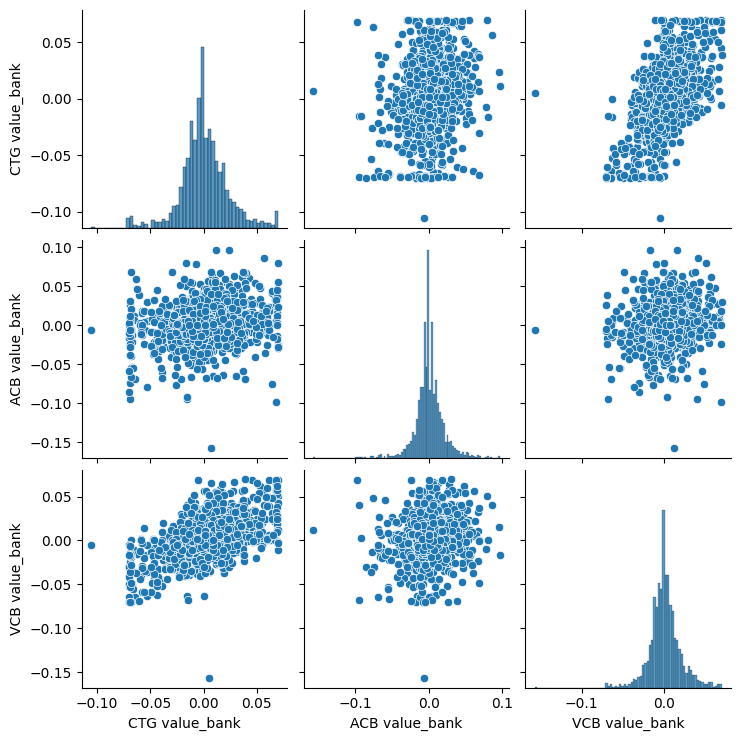

In [65]:
import seaborn as sns
sns.pairplot(value_banks)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16404\310587507.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Python312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning:

invalid value encountered in divide



<Axes: xlabel='ACB value_bank'>

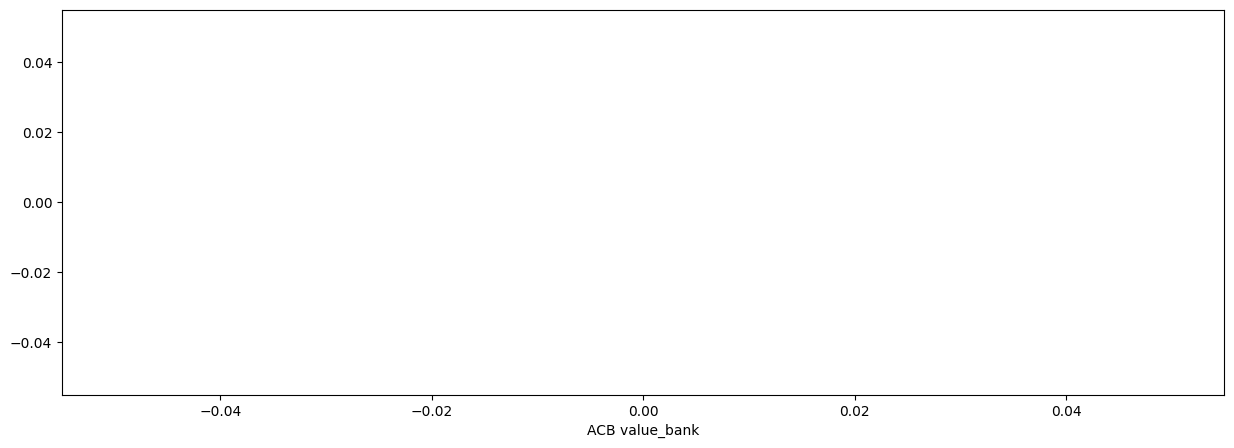

In [70]:
plt.figure(figsize=(15,5)) # Tùy chỉnh kích thước biểu đồ
sns.distplot(value_banks.loc['2020-01-01':'2020-12-31']['ACB value_bank'],color='green',bins=100)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: VCB value_bank, dtype: float64
Số lượng giá trị NaN: 0


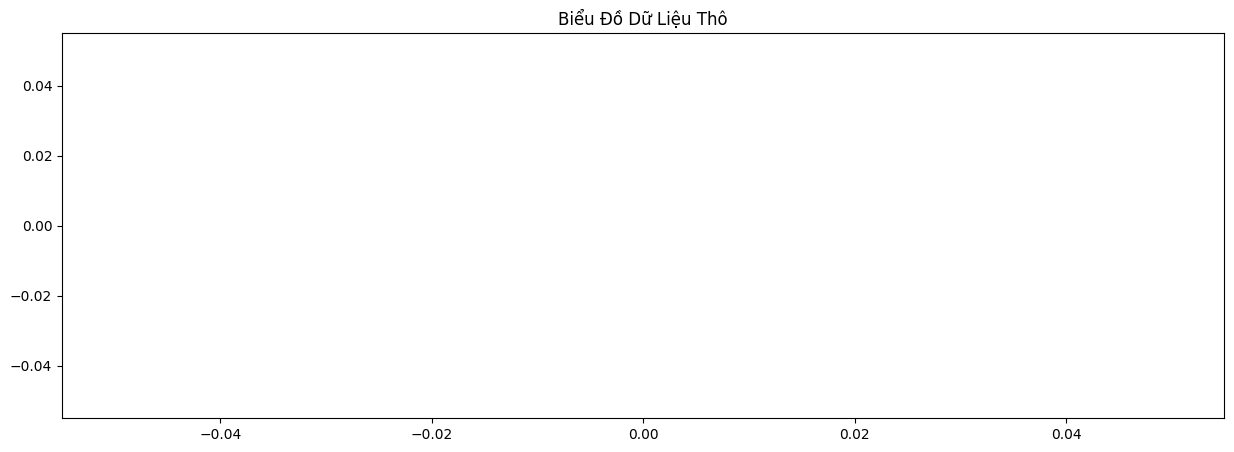

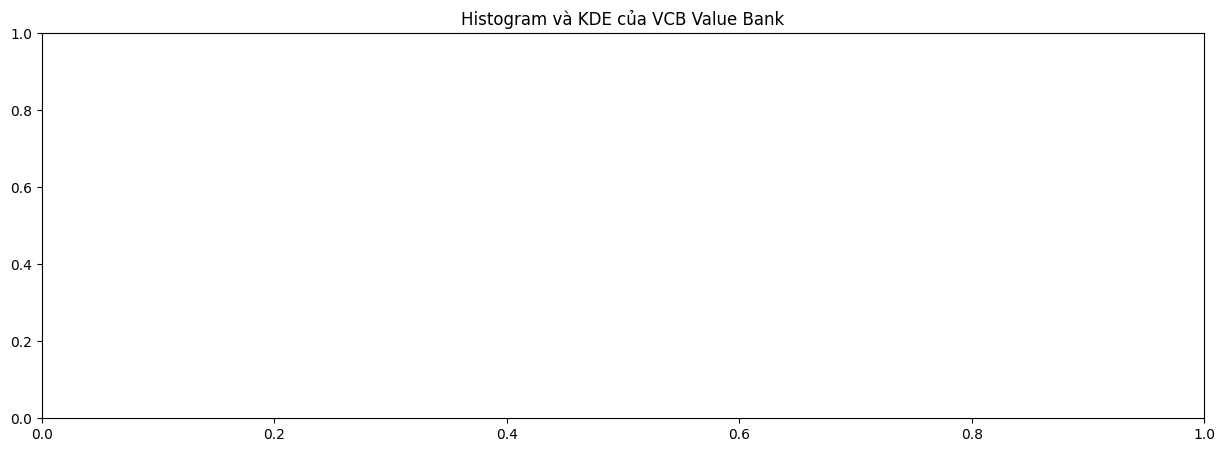

In [60]:
# Chọn dữ liệu
data_subset = value_banks.loc['2020-01-01':'2020-12-31']['VCB value_bank']

# Kiểm tra tổng quan dữ liệu và giá trị NaN
print(data_subset.describe())
print("Số lượng giá trị NaN:", data_subset.isna().sum())

# Vẽ biểu đồ dữ liệu thô để nhìn thấy phân bố của nó
plt.figure(figsize=(15, 5))
plt.plot(data_subset, 'o')
plt.title("Biểu Đồ Dữ Liệu Thô")
plt.show()

# Điều chỉnh biểu đồ histogram
plt.figure(figsize=(15, 5))
sns.histplot(data_subset, color='green', bins=30, kde=True)  # Giảm số lượng bins
plt.title("Histogram và KDE của VCB Value Bank")
plt.show()



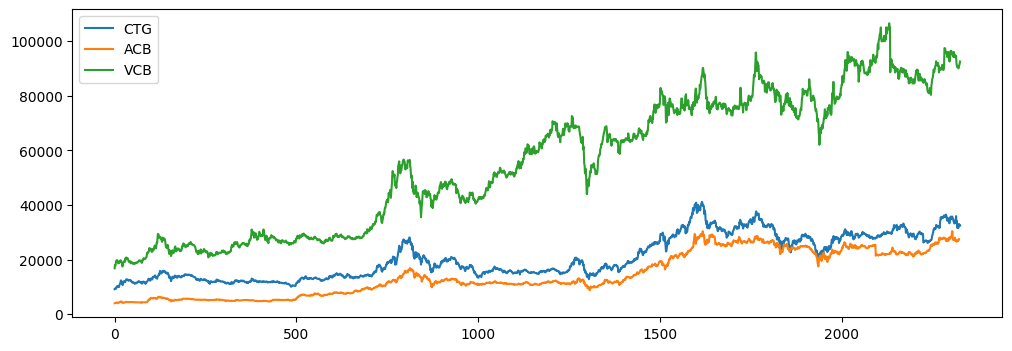

In [46]:
for tick in list_banks:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: >

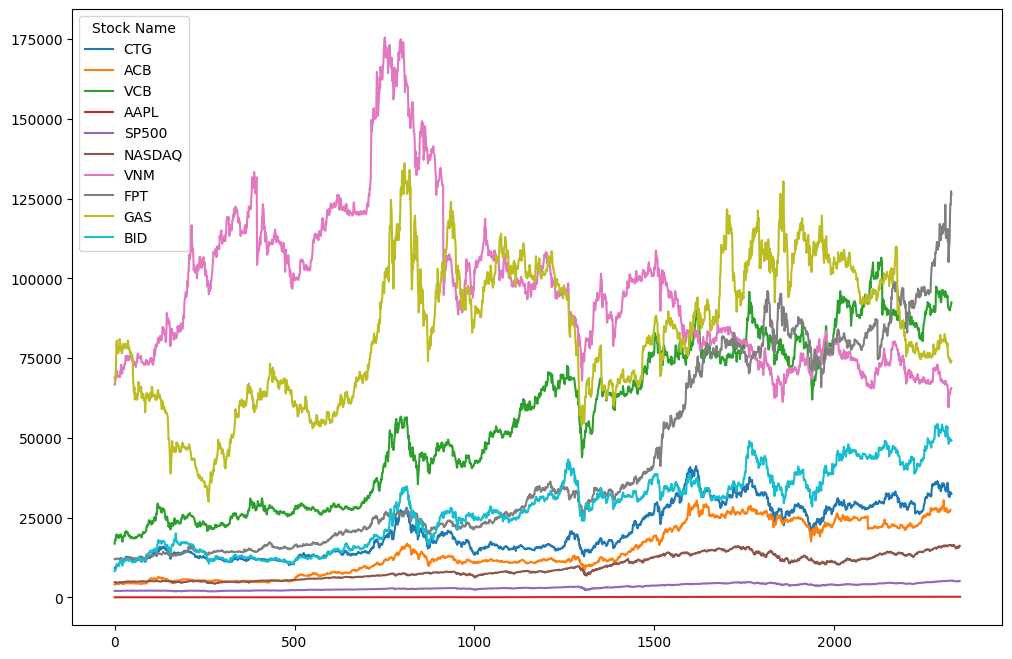

In [47]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize =(12,8))

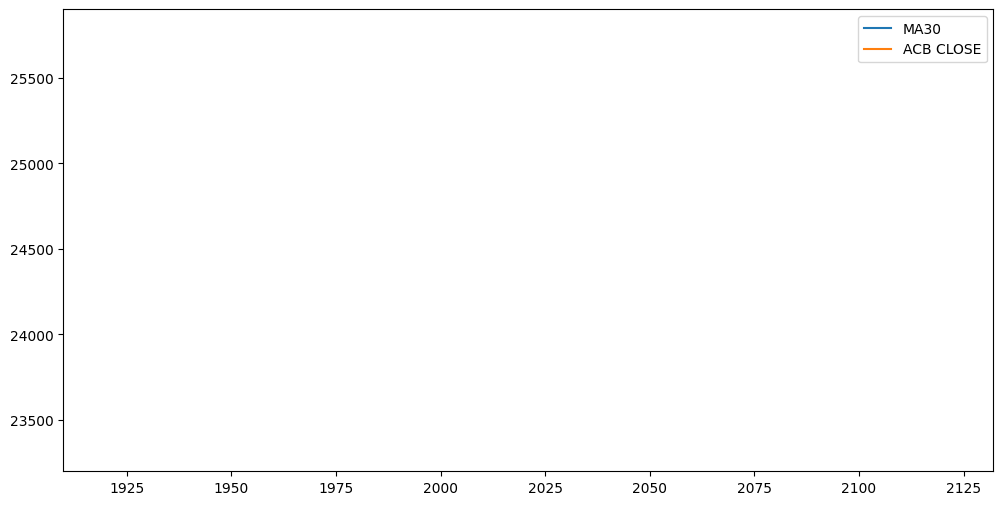

In [48]:
plt.figure(figsize=(12,6))
ACB['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='MA30')
ACB['Close'].loc['2020-01-01':'2021-01-01'].plot(label='ACB CLOSE')
plt.legend()

In [71]:
plt.figgure(figsize=(12,5))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'figgure'

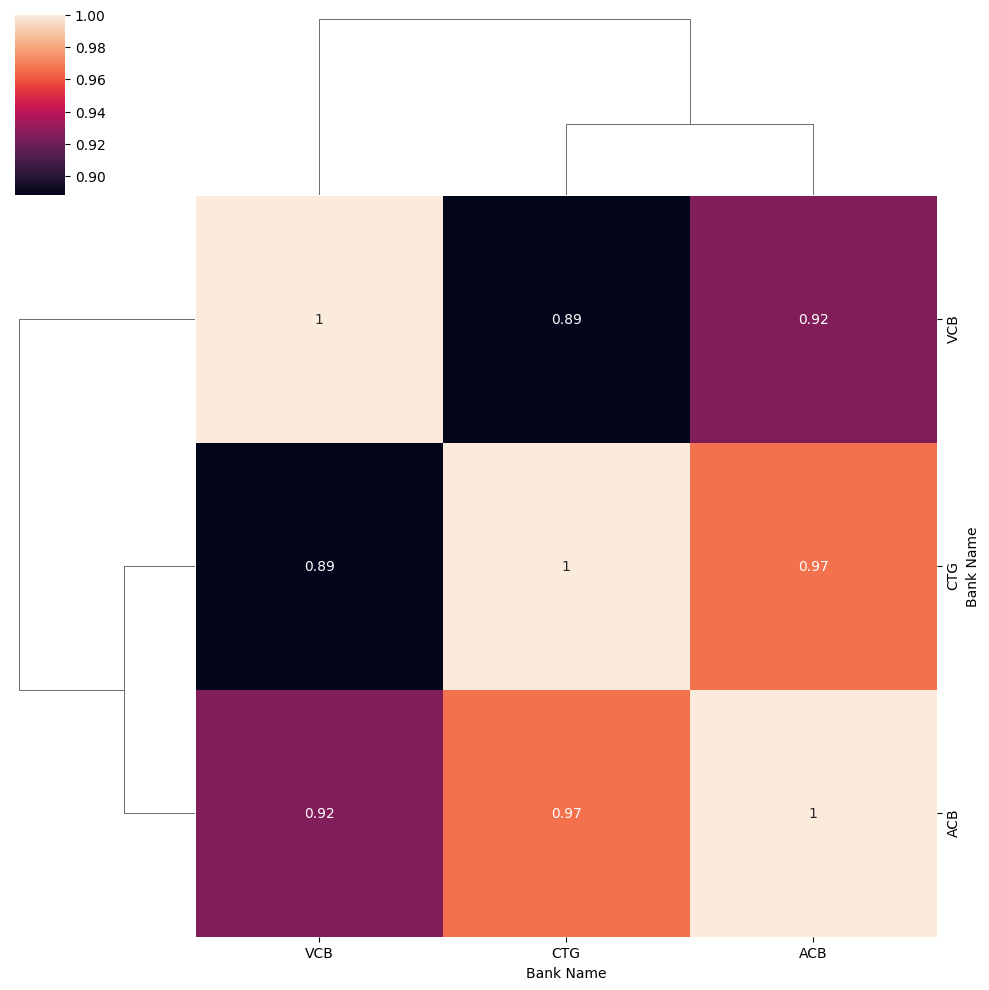

In [72]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [73]:
cf.go_offline()

pio.renderers.default = "colab"

In [74]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(title = "Giá đóng cửa",
                                                            xTitle = "Năm", yTitle = "Giá")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [75]:
CTG['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[7,14,21],title='SMA CTG')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [76]:
VCB['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<h3>Vẽ biểu đồ hình nến mã chứng khoán ACB

In [77]:

ACB[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
cf.datagen.ohlc()
acb_plot = cf.QuantFig(ACB,title = 'Biểu đồ hình nến',legend = "Top", name = "Nến")
acb_plot.add_bollinger_bands(colors =["red", 'green'])
acb_plot.iplot()

In [ ]:
#Thêm vào các chỉ số phân tích kỹ thuật vào mã ACB
acb_plot.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
acb_plot.add_rsi(periods=20,color='java')
acb_plot.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
acb_plot.add_volume()
acb_plot.add_macd()
acb_plot.iplot()